In [91]:
import pandas as pd
import lifelines
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize'] = (10.0, 6.0)


In [2]:
raw_df = pd.read_csv("/Users/camerondavidson-pilon/Downloads/Parliamentarians.csv")

In [4]:
raw_df.head()

,Name,Province/Region of Birth,Type of Parliamentarian,Riding/Senatorial Division,Province/Territory,Gender,Profession,Political Affiliation,Date Appointed/Date of First Election,Years of Service,Military Service
0,"Abbott, Anthony Chisholm",Quebec,MP (1974/07/08 - 1979/05/21),Mississauga (1974/07/08 - 1979/05/21),Ontario,M,lawyer,Liberal Party of Canada (1974/07/08 - 1979/05/21),1974-07-08,"1778 days (4 years, 10 months, 13 days)",NaN
1,"Abbott, Douglas Charles",Quebec,MP (1953/08/10 - 1954/06/30)MP (1949/06/27 - 1...,Saint-Antoine--Westmount (1953/08/10 - 1954/06...,QuebecQuebecQuebec,M,lawyer,Liberal Party of Canada (1940/03/26 - 1954/06/30),1940-03-26,"5207 days (14 years, 3 months, 3 days)",NaN
2,"Abbott, Jim",Ontario,MP (1997/06/02 - 2011/05/01)MP (1993/10/25 - 1...,Kootenay--Columbia (1997/06/02 - 2011/05/01)Ko...,British ColumbiaBritish Columbia,M,"manager, businessman",Conservative Party of Canada (2003/12/23 - 201...,1993-10-25,"6396 days (17 years, 6 months, 4 days)",NaN
3,"Abbott, John Joseph Caldwell",,MP (1881/08/17 - 1887/02/21)MP (1880/02/12 - 1...,Inkerman (1887/05/12 - 1893/10/30)Argenteuil (...,QuebecQuebecQuebecQuebec,M,"professor, lawyer, dean",Liberal-Conservative (1887/05/12 - 1893/10/30)...,1867-09-20,"7467 days (20 years, 5 months, 10 days)",NaN
4,"Ablonczy, Diane",Illinois,MP (1997/06/02 - 2015/10/18)MP (1993/10/25 - 1...,Calgary Nose Hill (1997/06/02 - 2015/10/18)Cal...,AlbertaAlberta,F,"farmer, lawyer, teacher",Conservative Party of Canada (2003/12/23 - 201...,1993-10-25,"8027 days (21 years, 11 months, 22 days)",NaN


In [71]:
df = raw_df.drop(['Name', 'Riding/Senatorial Division', 'Province/Territory', 
                  'Political Affiliation', 
                  'Military Service', 'Province/Region of Birth'], axis=1).dropna()

In [72]:
import re


def parse_years_of_service(s):
    return int(re.search("(\d*) days", s).group(1))
  
def parse_year_of_first_date_appointed(s):
    return s[:4]
    
def parse_Type_of_Parliamentarian_if_censored(s):
    if re.search("\(\d{4}/\d{2}/\d{2} - \)", s):
        return False
    return True
    
df['left_office?'] = df['Type of Parliamentarian'].map(parse_Type_of_Parliamentarian_if_censored)
df['days'] = df['Years of Service'].map(parse_years_of_service)
df['year_first_appointed'] = df['Date Appointed/Date of First Election'].map(parse_year_of_first_date_appointed)
df['decade_first_appointed'] = df['year_first_appointed'].str.slice(0,3) + 'x'


df = df.drop(['Years of Service', 'Type of Parliamentarian', 'Date Appointed/Date of First Election'], axis=1)

In [73]:
df.head()

,Gender,Profession,left_office?,days,year_first_appointed,decade_first_appointed
0,M,lawyer,True,1778,1974,197x
1,M,lawyer,True,5207,1940,194x
2,M,"manager, businessman",True,6396,1993,199x
3,M,"professor, lawyer, dean",True,7467,1867,186x
4,F,"farmer, lawyer, teacher",True,8027,1993,199x


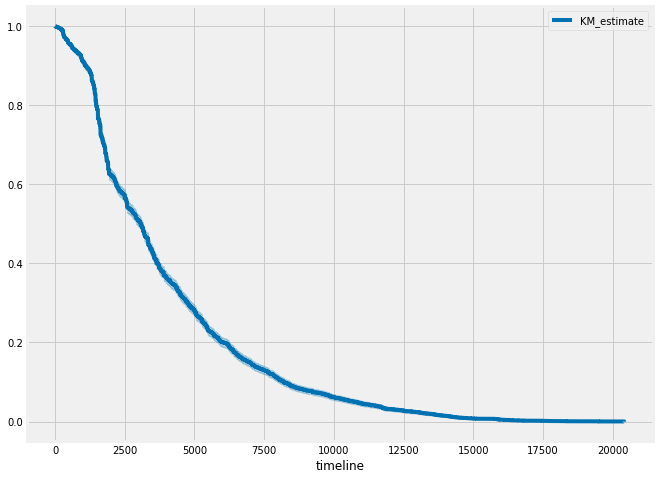

In [92]:
kmf = lifelines.KaplanMeierFitter()
kmf.fit(df['days'], df['left_office?'])
kmf.plot()

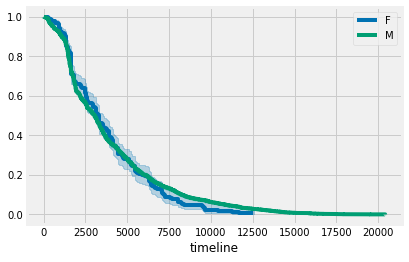

In [80]:
ax = plt.subplot(111
                )
for label, g in df.groupby('Gender'):
    kmf.fit(g['days'], g['left_office?'], label=label)
    kmf.plot(ax=ax)


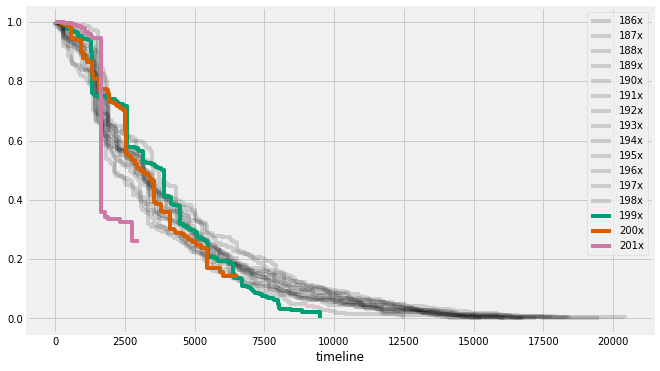

In [95]:
ax = plt.subplot(111)

for label, g in df.groupby('decade_first_appointed'):
    kmf.fit(g['days'], g['left_office?'], label=label)
    if label == '200x' or label == '201x' or label == '199x':
        kmf.plot(ax=ax, ci_show=False)
    else:
        kmf.plot(ax=ax, c='k', alpha=0.15, ci_show=False) 


In [87]:
kmf.plot?